This notebook compares the different scatterig model solutions for cod larvae.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import array as arr
import inverse_method_funs as inv

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load data
### ZooScatR results

In [12]:
fname_zsr = '../ZooScatStuff/my_data.feather'
specs, freqs_zsr, sigbs_zsr, sigbs_mean_zsr = inv.read_scatteringmodelsimulations(fname_zsr, nsim=1000)

### Viscous elastic model results

In [13]:
cod_scat = pd.read_csv('CODlarvae.txt', header=None, delimiter=' ', names=['frequency', 'TS'], skiprows=1)
cod_sigbs_ve = 10**(cod_scat['TS']/10)
freqs_ve = cod_scat['frequency']/1000

## Plot Comparison

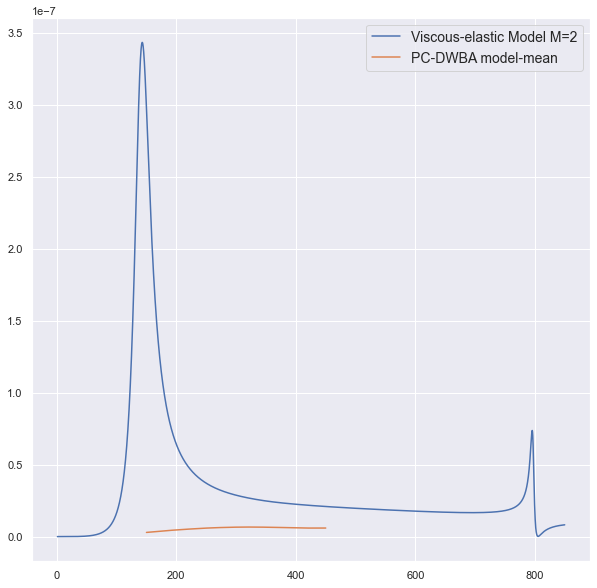

In [25]:
ind_spec = specs=='FishLarvae'
k = np.random.randint(1000)

fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
plt.plot(freqs_ve,cod_sigbs_ve, label='Viscous-elastic Model M=2')
plt.plot(freqs_zsr,sigbs_mean_zsr[:,ind_spec], label='PC-DWBA model-mean')
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.legend(fontsize=14)

In [6]:
ind_spec = specs=='FishLarvae'

In [7]:
ind_spec

array([False, False, False, False, False, False,  True])

In [8]:
np.shape(freqs_ve)

(8774,)

In [9]:
np.where(freqs_ve==0)

(array([8490], dtype=int64),)

In [10]:
freqs_ve[8207],freqs_ve[8489],freqs_ve[8490],freqs_ve[8491]

(821.7, 849.9, 0.0, 821.7)

In [11]:
cod_scat['frequency'][8492]

821800.0